# <u>Employee Performance Analysis</u>

- Candidate Name   : CHANDRAN S

- Candidate E-Mail : schandran375@gmail.com

- Registered Trainer : Ashok Kumar A

- Project Code     : 10281

- Assesment ID     : E10901-PR2-V18

 <img src ="details.png" width="500">



# Project Summary
## <u>Business Case: INX Future Inc Employee Performance -  Project</u>
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider 
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 
years. INX human resource policies are considered as employee friendly and widely perceived as best 
practices in the industry. 
Recent years, the employee performance indexes are not healthy and this is becoming a growing 
concerns among the top management. There has been increased escalations on service delivery and 
client satisfaction levels came down by 8 percentage points. 
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing 
employees as this would affect the employee morale of all the employees in general and may further 
reduce the performance. Also, the market perception best employer and thereby attracting best talents 
to join the company.  
Mr. Brain decided to initiate a data science project , which analyses the current employee data and find 
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects 
the findings of this project will help him to take right course of actions. He also expects a clear indicators 
of non performing employees, so that any penalization  of non-performing employee, if required, may 
not significantly affect other employee morals. 
 
The following insights are expected from this project. 
1. Department wise performances 
2. Top 3 Important Factors effecting employee performance 
3. A trained model which can predict the employee performance based on factors as inputs. This 
will be used to hire employees 
4. Recommendations to improve the employee performance based on insights from analysis. 

## <u>Requirement</u>
Data from third party sources. The employee performance data of INX Future Inc. can be downloads from below link. http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls


## <u>DOMAIN ANALYSIS</u>

First understand the menaing of feature and checking the impact of input feature to dependant feature.
- 1.EmpNumber:

  - An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.
- 2.Age:

  - Age of employee in years
- 3.Gender:

  - Gender of employee [Male/Feamale]
- 4.EducationBackground:

  - This will be a high school diploma or a post-secondary degree of a employee
- 5.MaritalStatus:

  - Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other
- 6.EmpDepartment:

  - Department specifice of employee

- 7.EmpJobRole:

  - Job role means the key responsibility of a job profile or job position.
  
- 8.BusinessTravelFrequency:

  - The employee travel for comapny buisness purpose.
  
- 9.DistanceFromHome:

  - Distance between home to company of employee.
  
- 10.EmpEducationLevel:

  - Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.
  
- 11.EmpEnvironmentSatisfaction:

  - satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.
  
- 12.EmpHourlyRate:

  - Hourly Rate means the amount paid to an employee for each hour worked.
  
- 13.EmpJobInvolvement:

  - Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

- 14.EmpJobLevel:

  - Job levels, also known as job grades and classifications, set the responsibility level and expectations.

- 15.EmpJobSatisfaction:

  - level of contentment employees feel with their job.

- 16.NumCompaniesWorked:

  - employee work in how many companies.

- 17.OverTime:

  - employee work overtime or not. [Yes, No]

- 18.EmpLastSalaryHikePercent:

  - salary hike percent of employye in last year.
 
- 19.EmpRelationshipSatisfaction:

  - Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

- 20.TotalWorkExperienceInYears:

  - Total experiance of employee in years.

- 21.TrainingTimesLastYear:

  - Total training done by employee in last year.

- 22.EmpWorkLifeBalance:

  - “Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

- 23.ExperienceYearsAtThisCompany:

  - Total no of eaxperiance at current company.

- 24.ExperienceYearsInCurrentRole:

  - Total no of experiance in current job role.

- 25.YearsSinceLastPromotion:

  - Total no of year since last promotion of employee.

- 26.YearsWithCurrManager:

  - Employee total no of years with current manager.

- 27.Attrition:

  - Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

- 28.PerformanceRating:

  - This is a target feature, tell that the total rating of employee performance in company.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset
data= pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1_8.xls")
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Basic check

In [3]:
data.shape

(1200, 28)

In [4]:
data.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [5]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [6]:
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [7]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [8]:
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [9]:
data.BusinessTravelFrequency.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [11]:
data.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [12]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [13]:
data.EmpJobRole.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [14]:
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [15]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [16]:
# Display all columns
pd.set_option('display.max_columns',None)

In [17]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [18]:
# Display first 5 rows
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [19]:
# Display last 5 rows
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [20]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### There is no NaN or Null, missing values present in the Data Set.

In [21]:
# Checking null values in the dataset
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Project Summary with Analysis and Recommendation

In [22]:
# Distribution of Categorical features
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [23]:
# Distribution of Numerical features
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [24]:
# Counting values
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

# EDA(Exploratory Data Analysis)

### Univariate Analysis

In [25]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column].unique()   # for continous features we use unique>=10
        numerical_col.append(column)

In [26]:
display(len(numerical_col))
numerical_col

19

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

# Discrete Feature

In [27]:
# list of Discrete variables
discrete_col=[feature for feature in numerical_col if len(data[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_col)))
discrete_col

Discrete Variables Count: 9


['EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'EmpRelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'PerformanceRating']

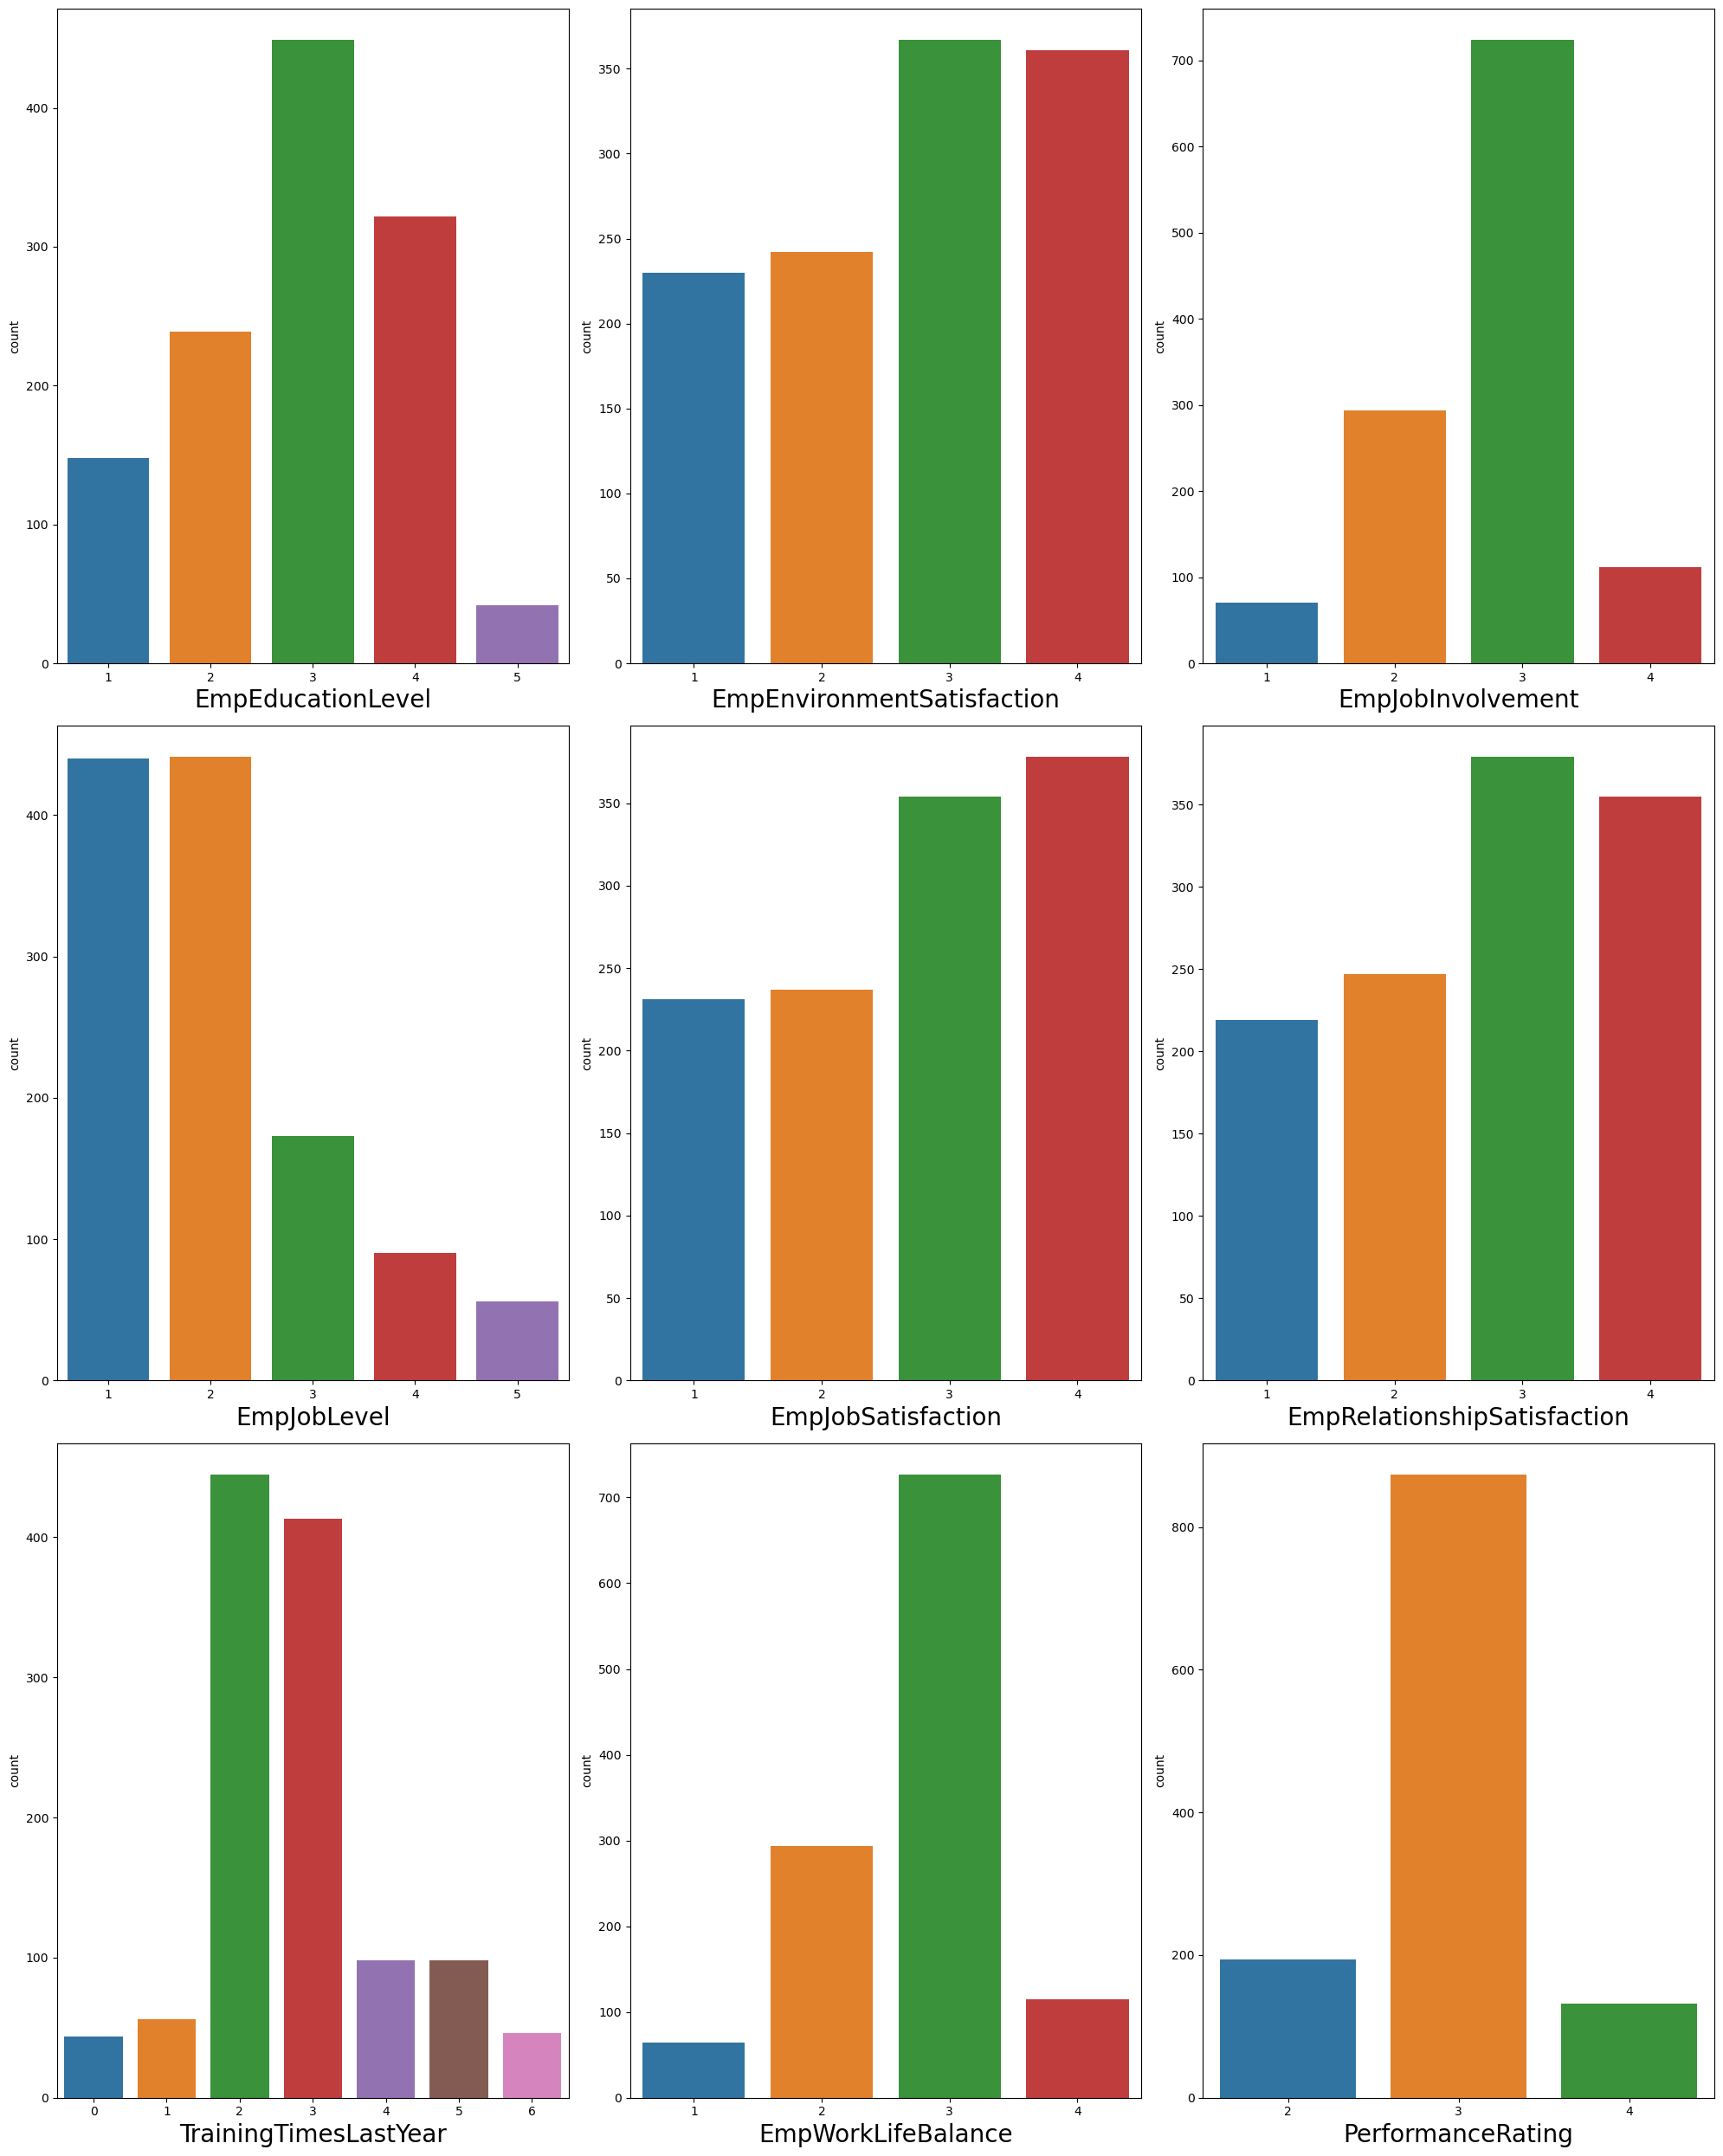

In [28]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1   # counter

for column in discrete_col: # iteration of columns / acessing the columns from count 
    if plotno<=9:           # set the limit
        plt.subplot(3,3,plotno)       # plotting 12 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=data[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)# assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

## Observations :

- **EmpEducationLevel :**


   - Total range of educational level is 1 to 5,Maximum no of employee education level is 3 and 4.
   - 2 education level employee is less than 250 and remianing 1 and 5 education level employee is less than 150.

- **EmpEnvironmentSatisfaction :**


   - Most of the employee Statisfaction is 3 and 4
   - 1 & 2 enviroment satisfaction employee less than 25
   
- **EmpJobInvolvement :**


   - Most of the employee job involvement is 3 and 2 job involment employee is less than 300.
   - 1 and 4 job involvment employee is less than 100.

- **EmpJobLevel :**


   - The range of employee job kevel is 1 to 5,most of the employee job level is 1 and 2.
   - Minimum no of job level is 5, and 3 & 4 job level employee is less than 180.

- **EmpJobSatisfaction :**


   - Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

- **EmpRelationshipSatisfaction :**


   - he range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.
   
- **TrainingTimesLastYear :**


   - The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.
   
- **EmpWorkLifeBalance:**


   - Most most the work life balance is 3 than less than 300 employee work life balance is 2.
   - Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

- **PerformanceRating :**


   - The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
   - less than 200 employee has 2 performance rating.


# Continues Features

In [29]:
continuous_col=[feature for feature in numerical_col if feature not in discrete_col]
print("Continuous feature Count {}".format(len(continuous_col)))
continuous_col

Continuous feature Count 10


['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

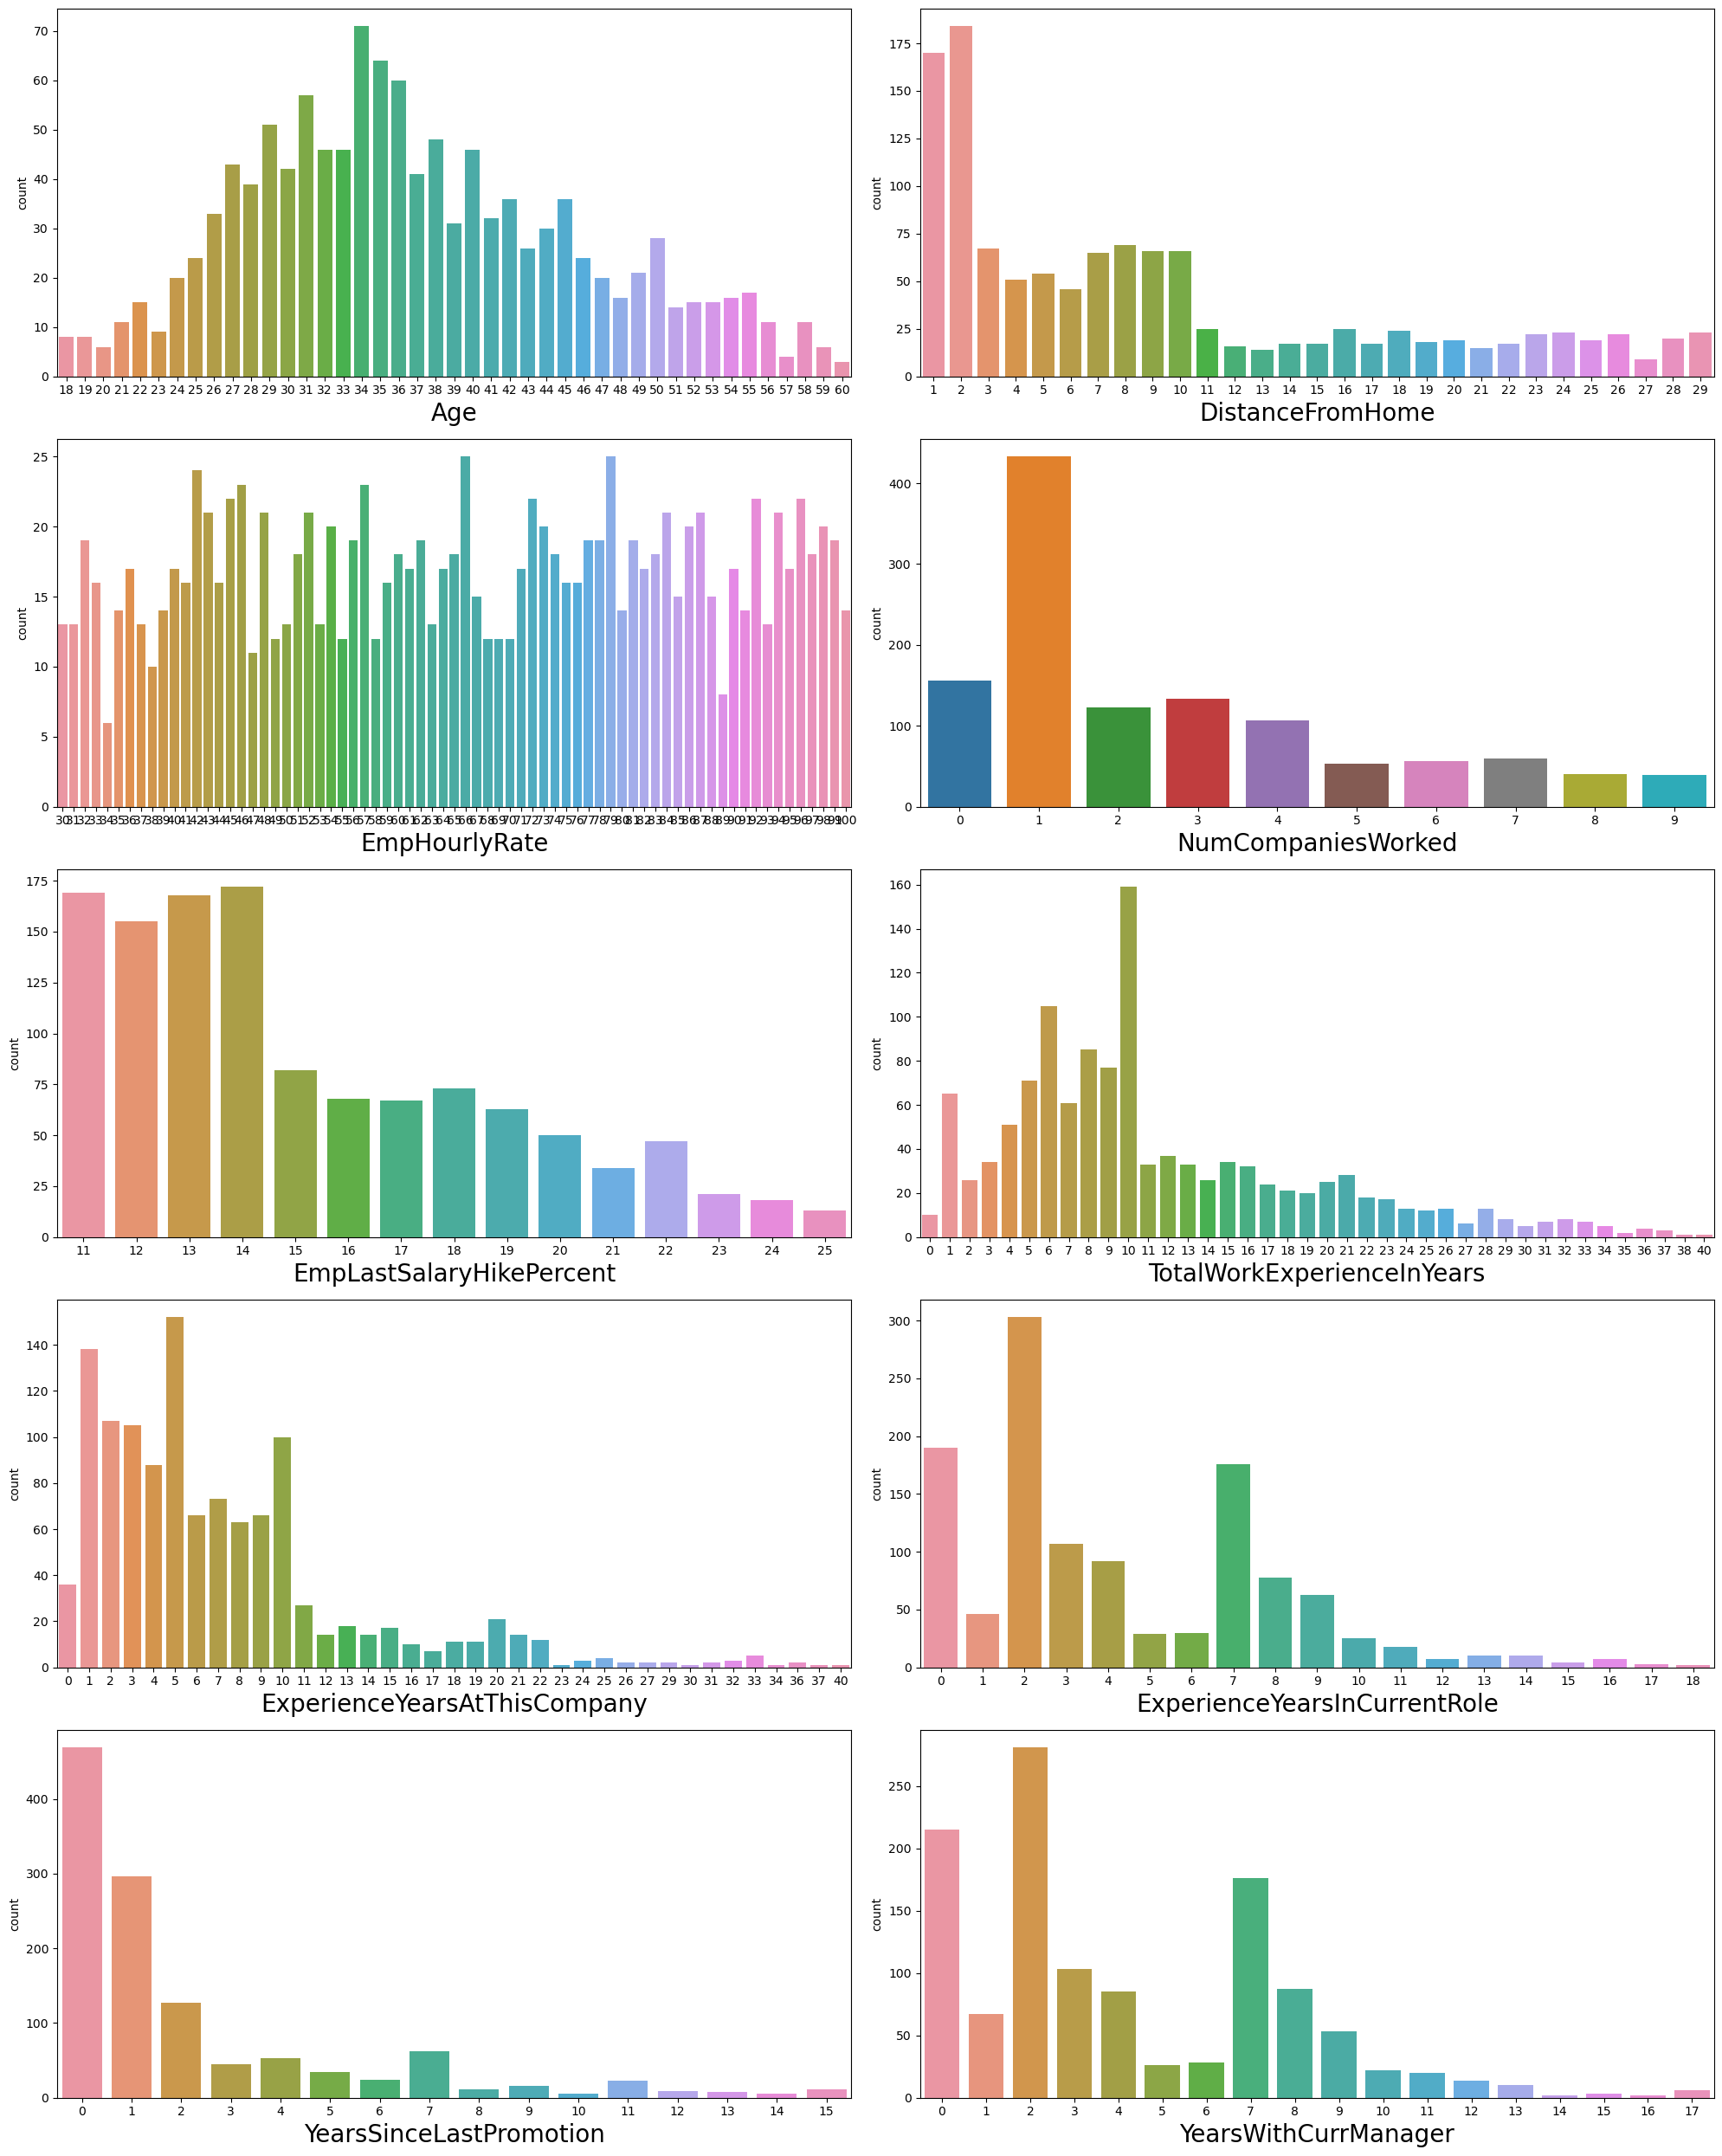

In [30]:
plt.figure(figsize=(20,25))  # defining canvas size
plotno = 1 # counter

for column in continuous_col: # iteration of columns / acessing the columns from count 
    if plotno<=10:            # set the limit
        plt.subplot(5,2,plotno)       # plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=data[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)# assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

## Observations

- **Age :**

  - The range of age between 18 to 60, most of the employee age between 25 to 40


- **DistanceFromHom :**

   - The range of distance between home to comapny is 1 to 29.
   - Maximum no of employee home to company distance is less than 10.


- **EmpHourlyRate :**

   - The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

- **NumCompaniesWorked :**

   -  Maximum no of employee work with only one company.
   - less no of employee work in more than 5 companies.


- **EmpLastSalaryHikePercen :**

   - Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
   - less than 80 employee last salary hike in between 15 to 19.



- **TotalWorkExperienceInYears :**

   - Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.


- **ExperienceYearsAtThisCompany :**

   - The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.


- **ExperienceYearsInCurrentRole :**
 
   - Maximum current role experiance of employee is 18.
   - Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
   - less than 200 employee have not current role experiance.


- **YearsSinceLastPromotion :**

   - The range of year since last promotion is 0 to 15.
   - Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.


- **YearsWithCurrManager :**

   - Most employee have 2 years with current manager and minimum 16 years with current manager.
   - The range in between 0 to 17 and less than 180 employee has 7 years with current manager.


# Categorical features

In [31]:
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)

In [32]:
print(len(categorical))
categorical

9


['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

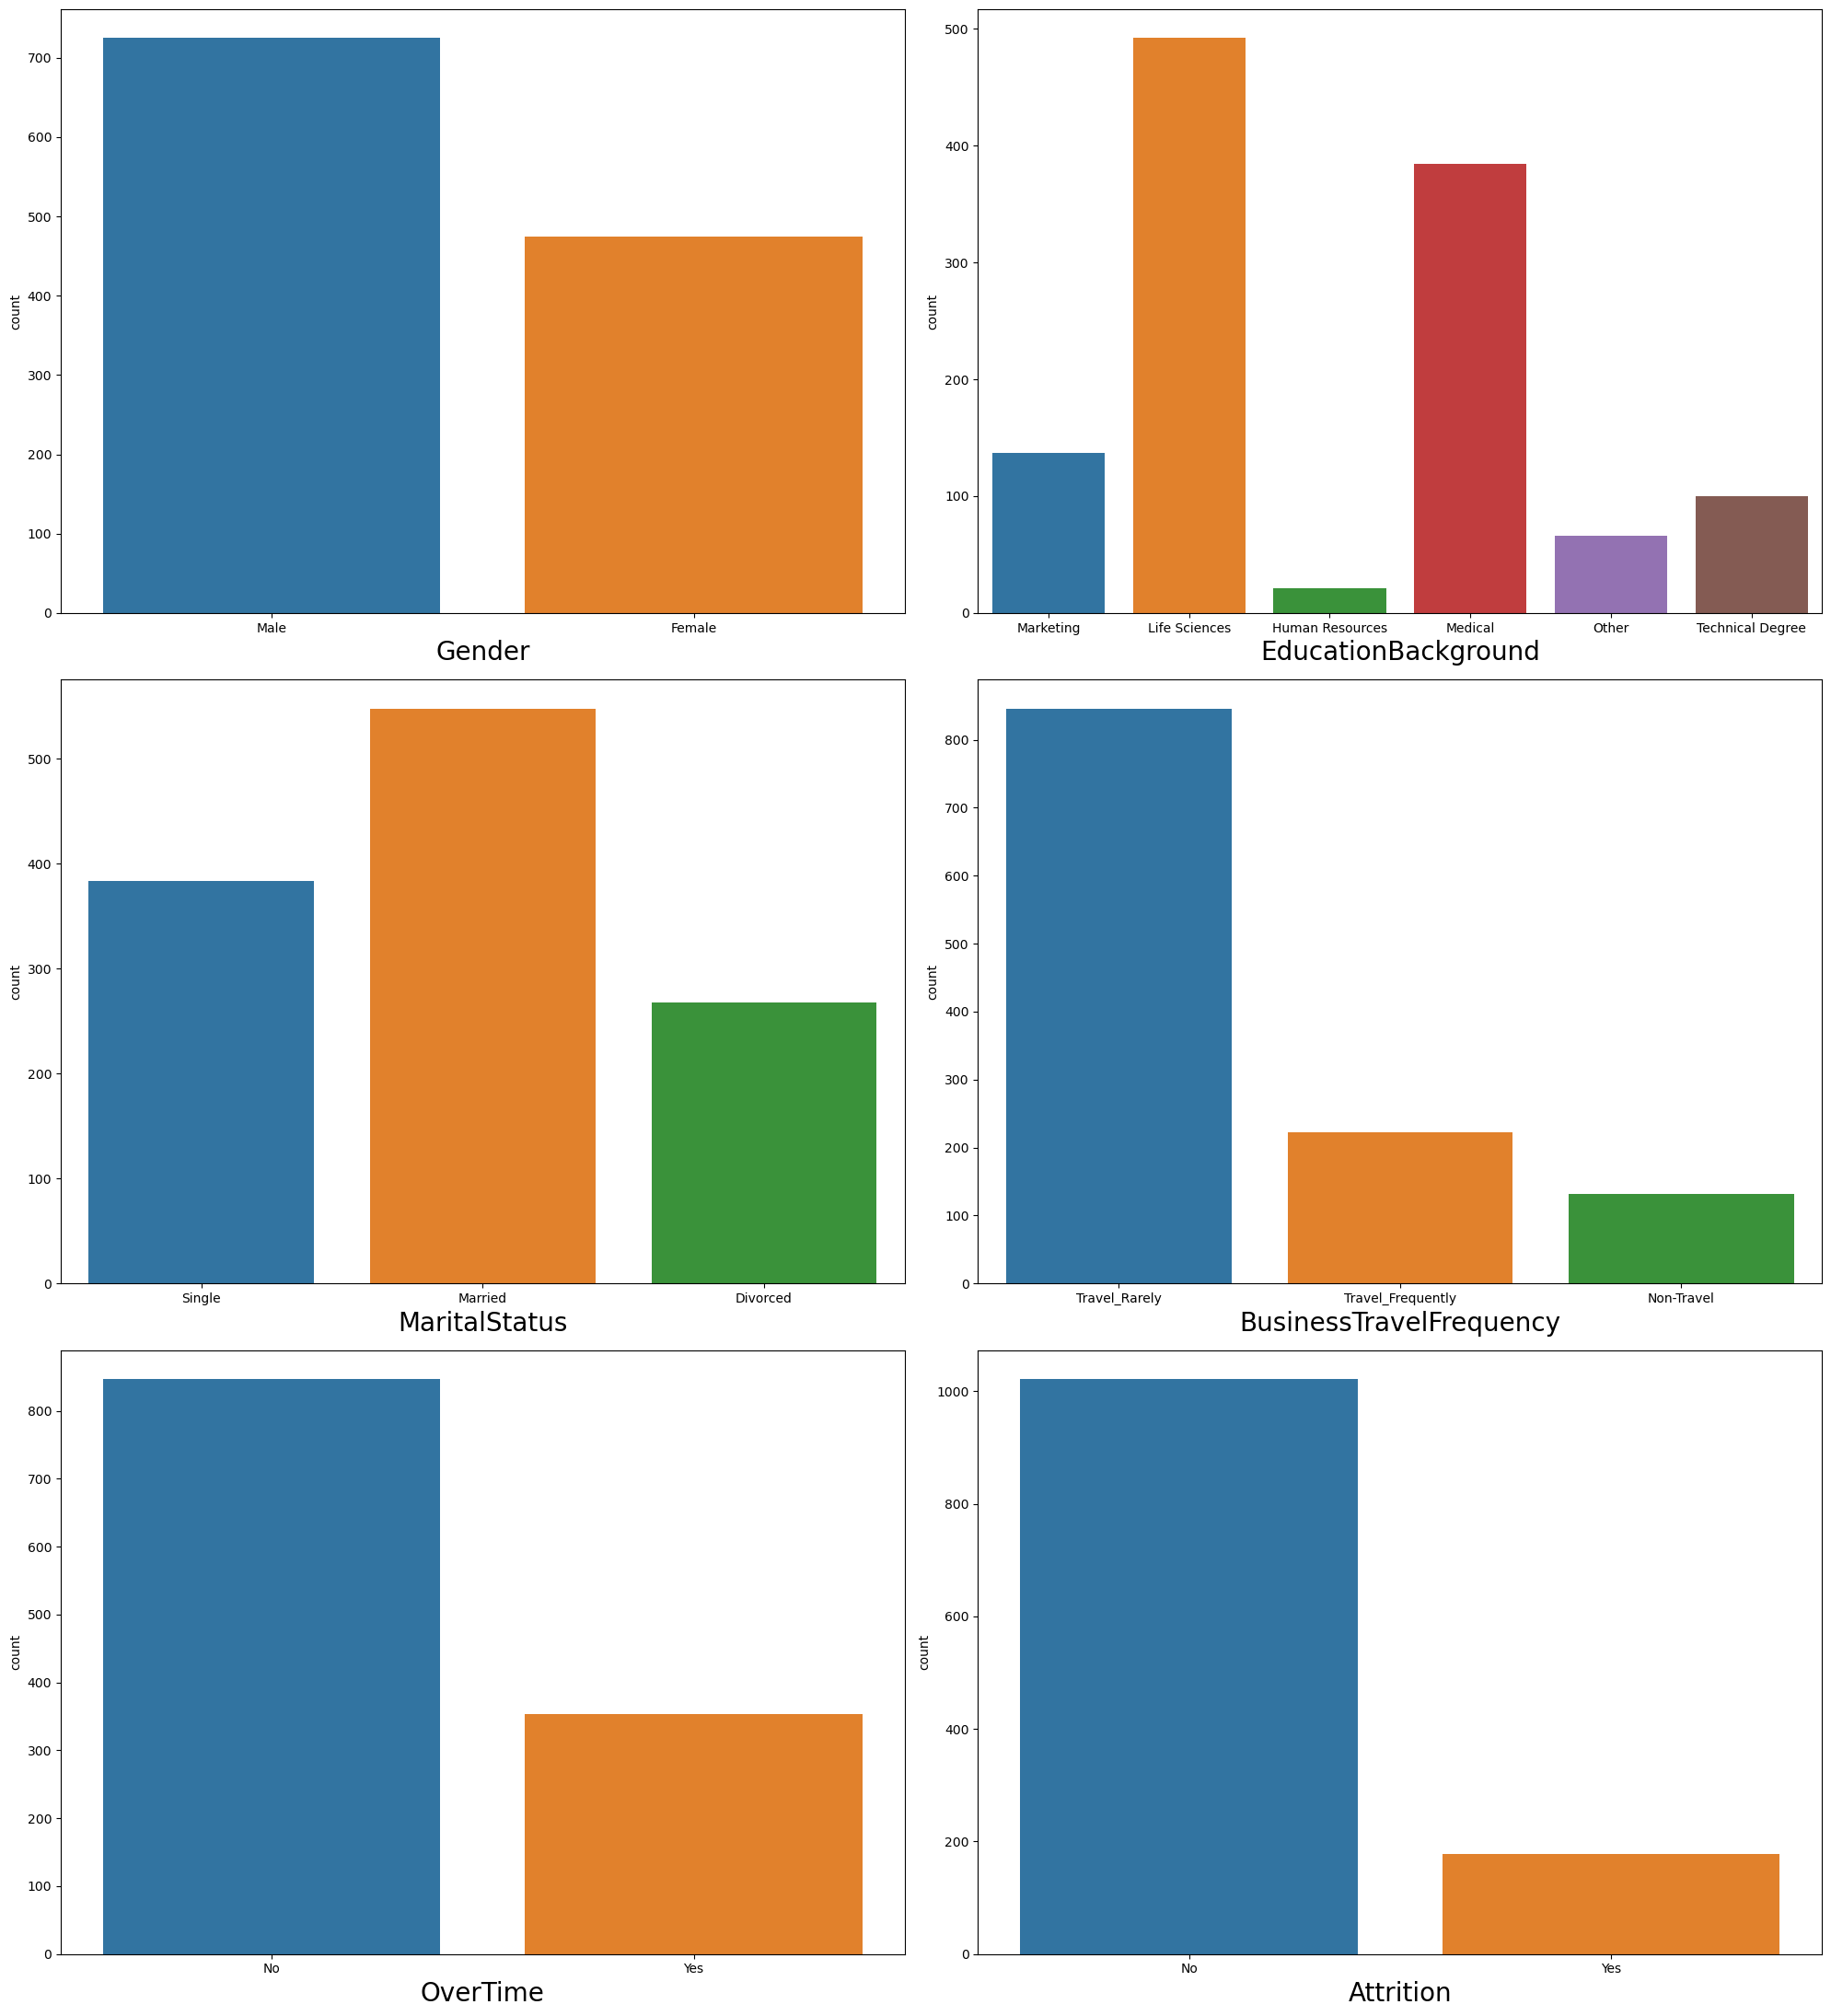

In [33]:
data1 = ['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in data1: # iteration of columns / acessing the columns from count 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno)       # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=data[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20) # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

#  Observations

- **Gender :**

  - Most of the male present in the comapany



- **EducationBackground :**

   - most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
   - other eduacation background employee is less than 100.



- **MaritalStatus :**

  - Most of the employee is married as well as less than 400 employee is single.
  - less than 300 employee mariatal status is divorced.



- **BusinessTravelFrequency :**

  - Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
  - remaining less than 120 employee not travell for buisness purpose.
  
  

- **OverTime :**

  - Most no of employee on doing over time and less than 350 employee doing overtime in company.
  
  

- **Attrition:**

  - Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

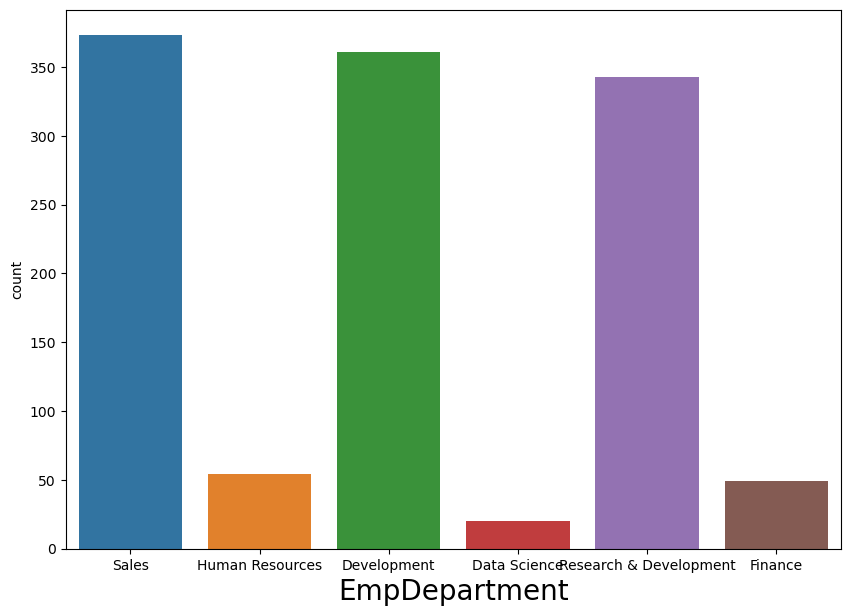

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x='EmpDepartment',data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

## Observations
- 
    Most of the employee from sales department as well as Development and research & Development departmnet employee is less than 320
-    Human resources & finance department employee is almost equal.
-    Data science employee has minimum in company.


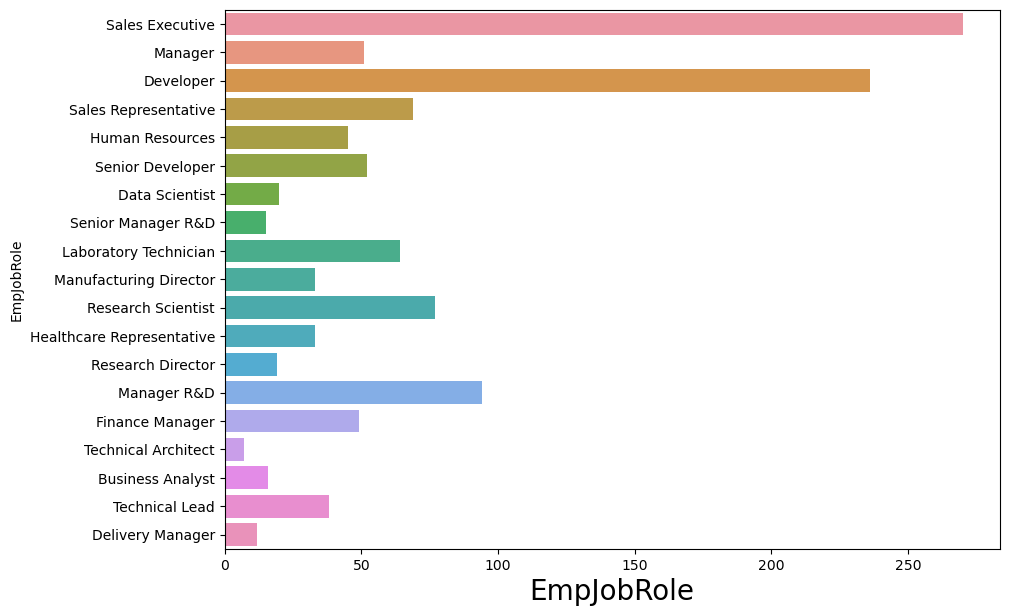

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(y='EmpJobRole',data=data)
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

## Observation
    
-  Sales executive employee job role is above 250 which is maximum and Developer job role employee count is 230.
-  Manage R & D and research scientist employee is less than 100 and remaining all job role employee is less than 65.


# BIAVARIATE ANALYSIS

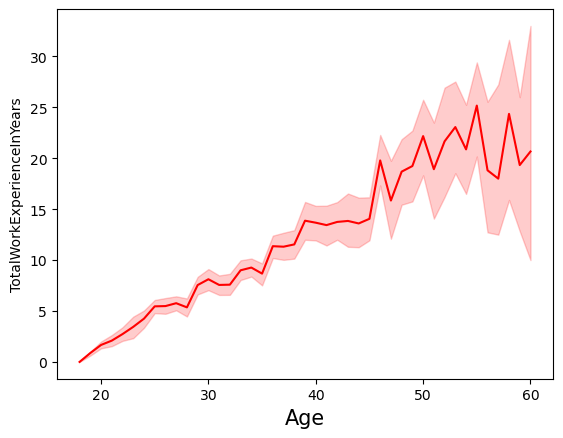

In [36]:
# Relation Between age & Experience Years at this Company
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data,color= 'r')
plt.xlabel('Age',fontsize=15)
plt.show()

## Observation
- If the age in between 18 to 25 then the total year of experiance is less than 5year.
- If the age is increases that time experiance also increases.


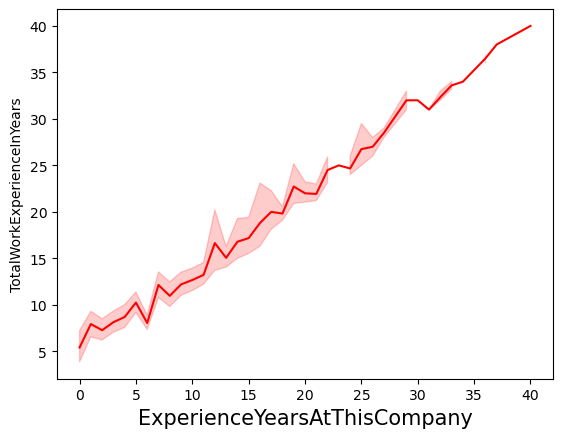

In [37]:
# Relation Between experiance year at this company & total work experiance
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',color= 'r',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

## Observation
- if his experiance year at this company is  increases that time total work experiance also increases.

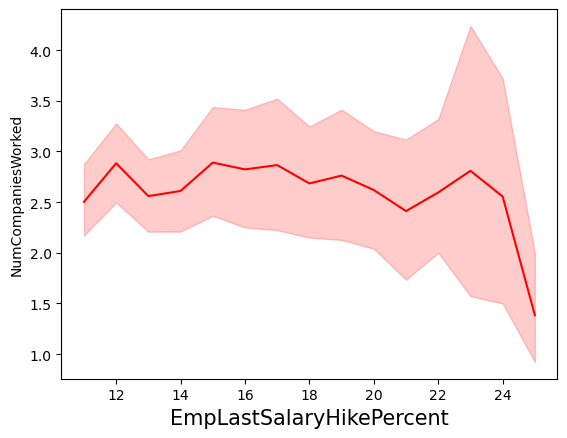

In [38]:
# Relation between Employee last salary hike and number of company worked
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',color= 'r',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

## Observation
- If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

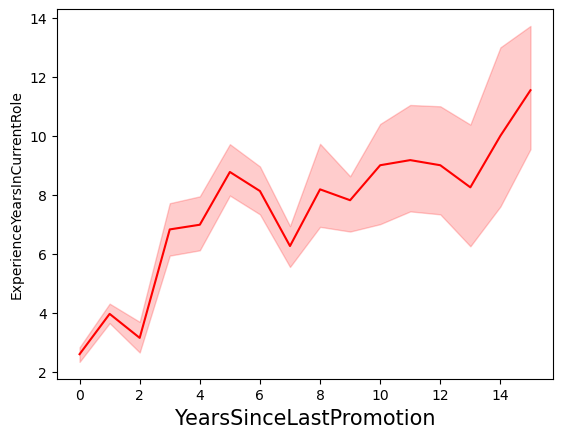

In [39]:
# Relation between Years Since Last Promotion and Experience Years In CurrentRole
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data,color= 'r')
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

## Observation
- In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

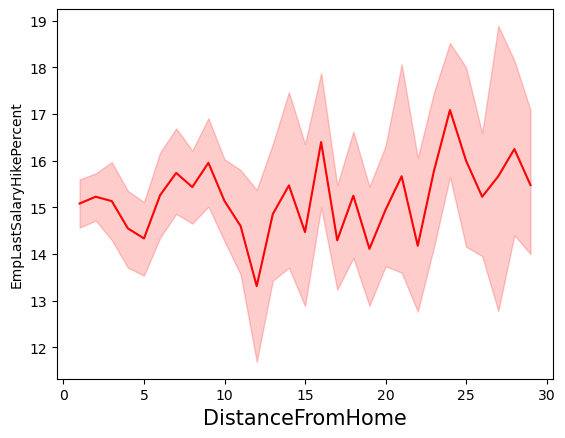

In [40]:
# Relation between Employee Hourly Rate and Years With Current Manager
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',color='r',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

## Observation
- If the distance from home is more then the employee salary hike is slightly increases.
- distance from home between 10 to 13 that time employee salary hike is decreases.


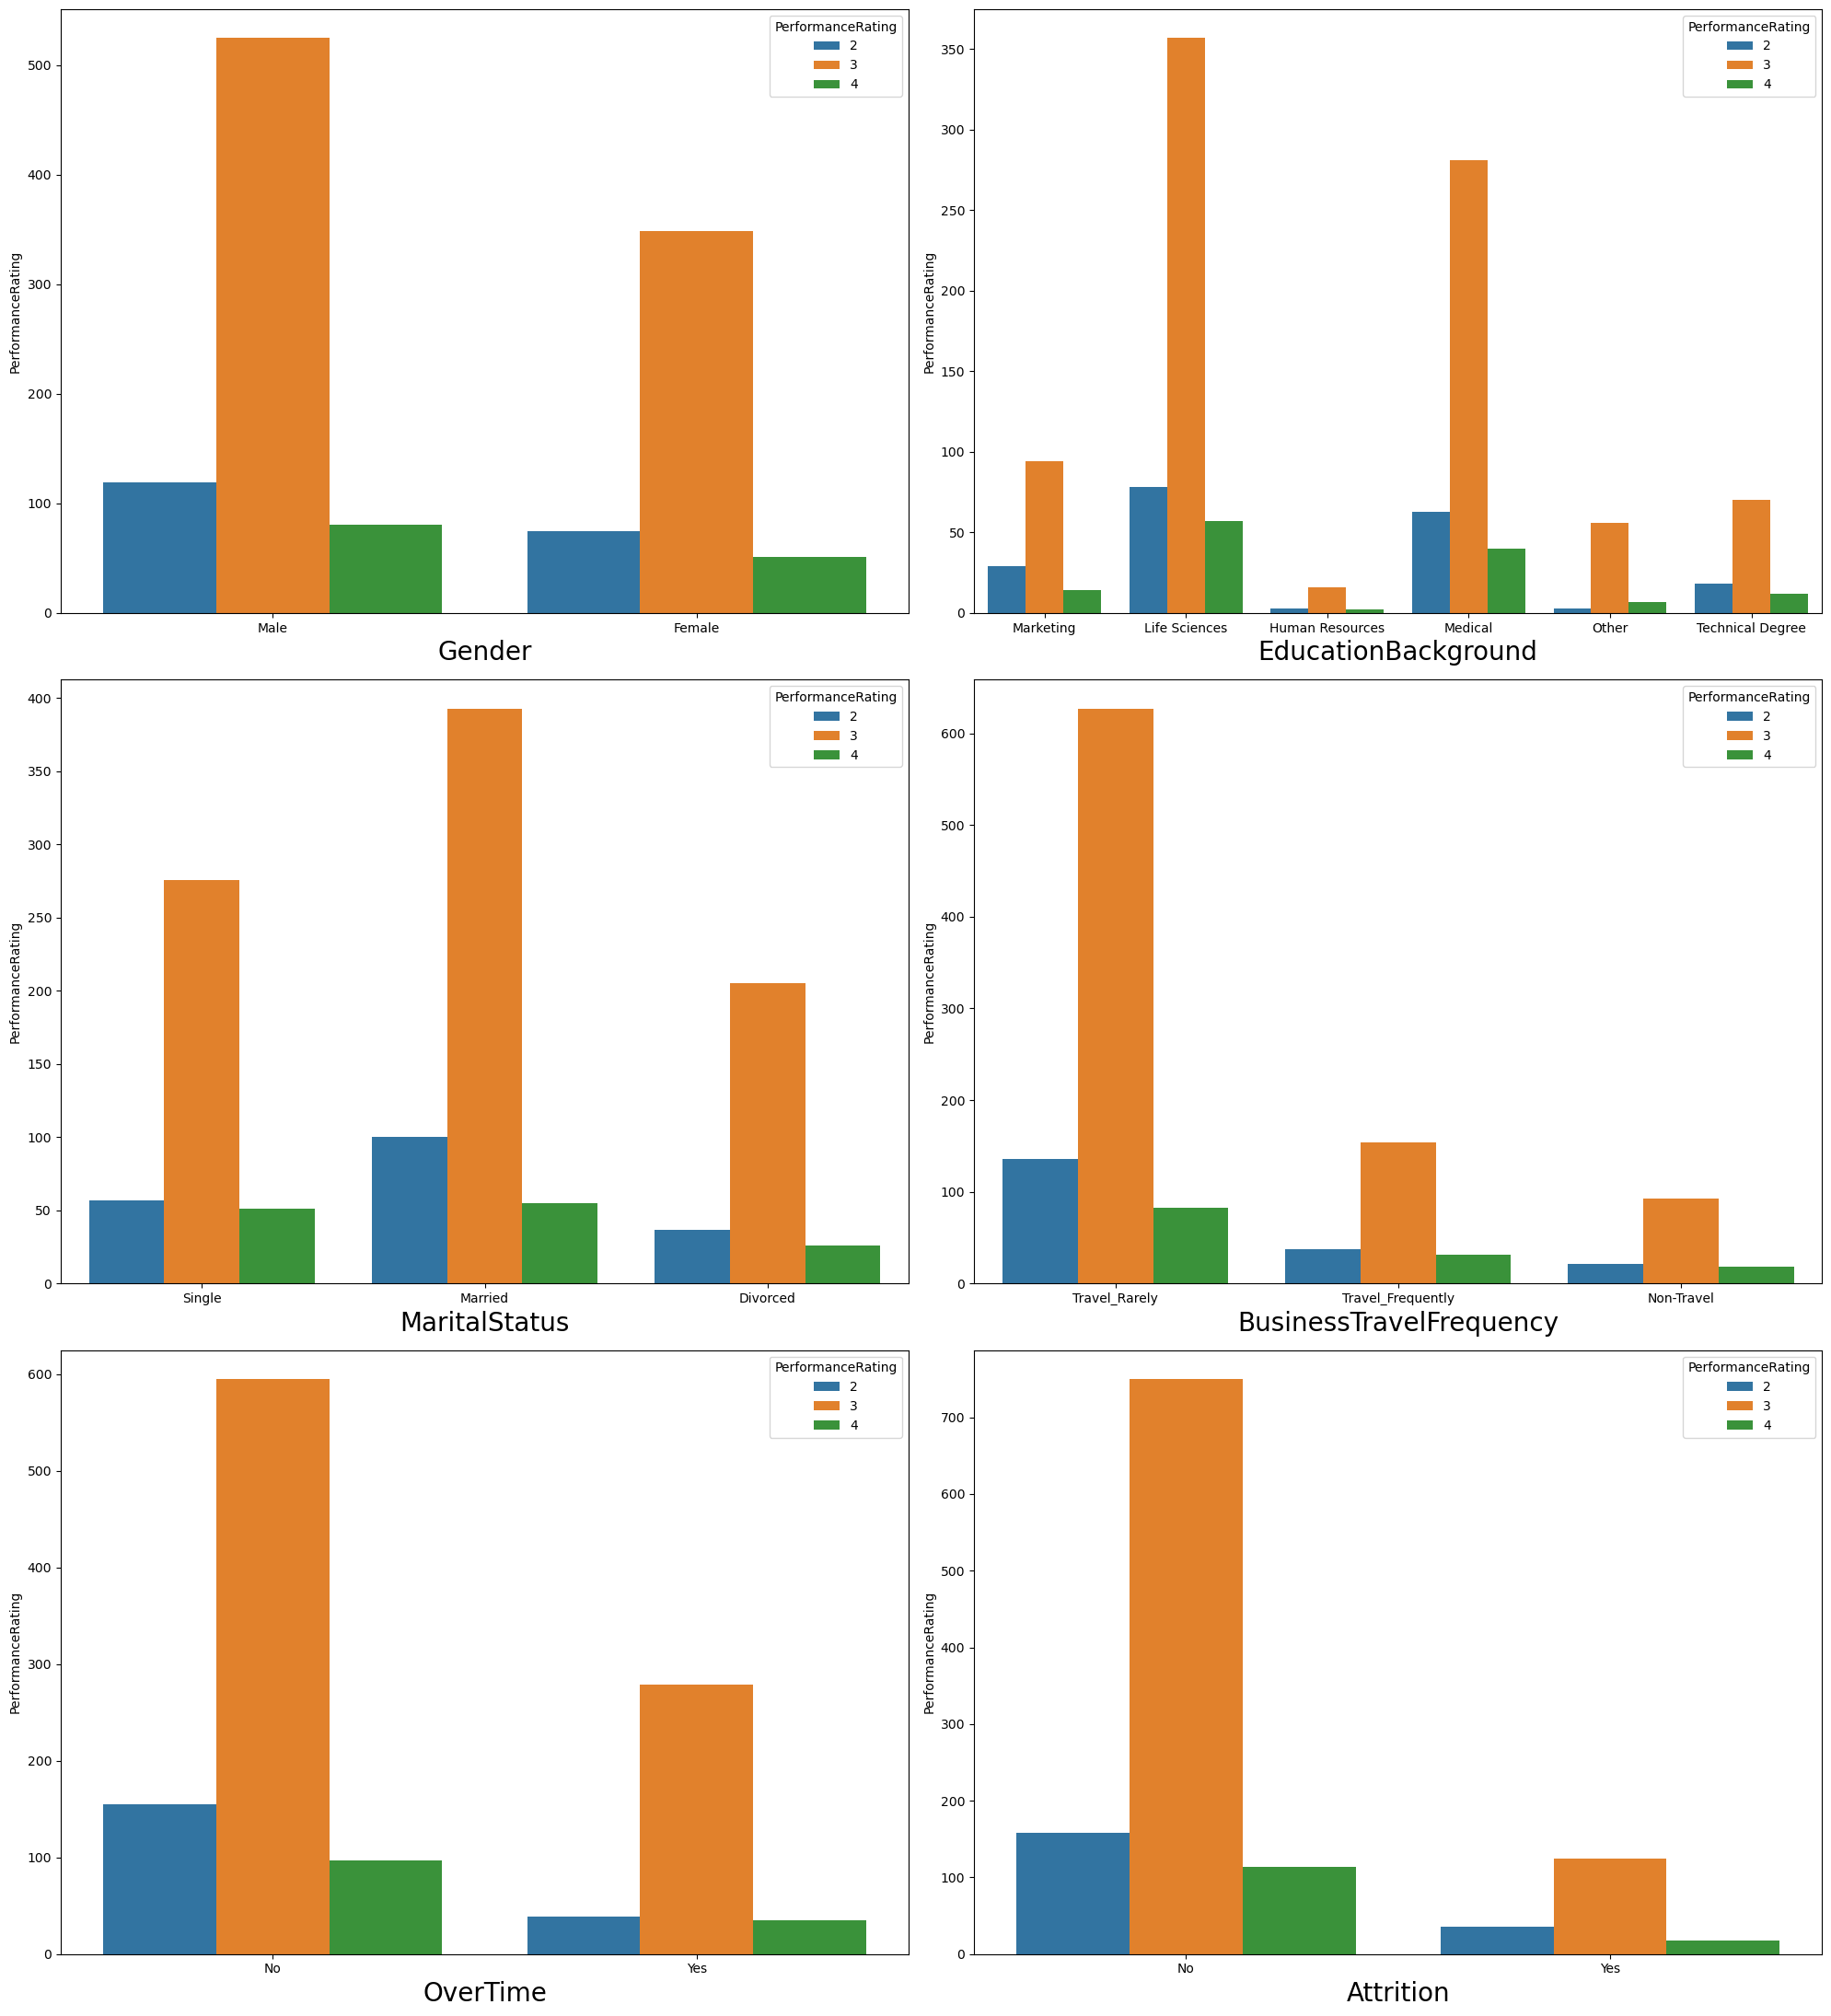

In [41]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

## Observation
- <u>**Relationship between Gender and performance rating**</u>


    - Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
    - four performance rating in both male & female is less
    

- <u>**Relationship between EducationBackground and performance rating**</u>

    - Maximum life sciences and medical education background employee rated with 3 performance rating
    - life science and medical education background employee also rated with 2 & 4 performance rating most of the time


- <u>**Relationship between MaritalStatus and performance rating**</u>

    - Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
    - In married marital status 2 performance rating emplyee is more than single or divorced.


- <u>**Relationship between Business Travel Frequency and performance rating**</u>

    - Maximum no of travel rarely employee has get 3 performance rating
    - Those employee travel frequentaly this employee also rated with 2, 3, and 4
    

- <u>**Relationship between Overtime and performance rating**</u>

    - Maximum no of employee with no overtime has rated with 3 perfomance rating
    - Those employee doing overtime that time 2 & 4 performance rating is constant.


- <u>**Relationship between Attrition and performance rating**</u>

    - Most of the employee rated with 3 performance rating in no means(They are not leave the company)
    - Those employee have 3 performace rating those also leave the company


# Department wise Analysis

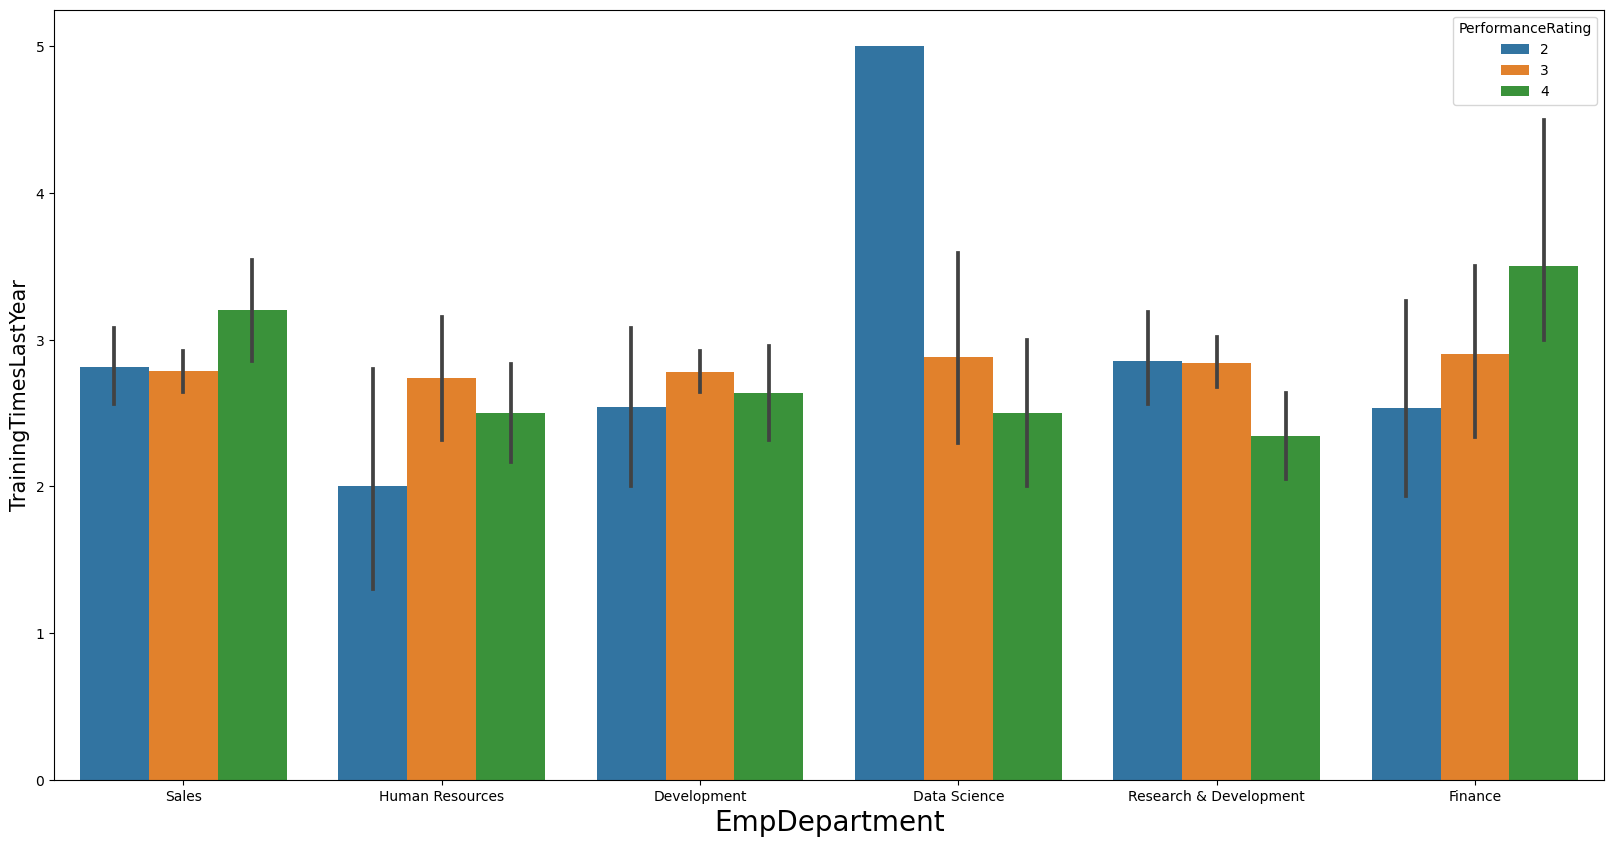

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

# Observation :
- If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
- Other all employee department with less than 3 time training in last year then the peroformance rating is constant.


# Data preprocessing

In [43]:
#copy dataset for backup
data1 = data.copy()

In [44]:
# checking missing values
data1.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- there is no missing values

# Label Encoding

In [45]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data1.iloc[:,i] = enc.fit_transform(data1.iloc[:,i])
data1.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   int32 
 3   EducationBackground           1200 non-null   int32 
 4   MaritalStatus                 1200 non-null   int32 
 5   EmpDepartment                 1200 non-null   int32 
 6   EmpJobRole                    1200 non-null   int32 
 7   BusinessTravelFrequency       1200 non-null   int32 
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Scaling the data
- Standard Scaling: Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [47]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data1[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

In [48]:
data1.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,2,2,5,13,2,0.102061,3,4,-0.543569,3,2,4,1,0,-0.889111,4,-0.170645,-0.622235,2,0.468778,0.749766,-0.681372,1.100251,0,3
1,E1001006,1.109888,1,2,2,5,13,2,0.591464,4,4,-1.187042,3,2,1,2,0,-0.889111,4,1.112397,-0.622235,3,-0.012431,0.749766,-0.370834,0.817773,0,3
2,E1001007,0.339260,1,1,1,5,13,1,-0.509693,4,4,-0.890055,2,3,1,5,1,1.594054,3,1.112397,-0.622235,3,1.752001,2.410786,-0.370834,2.230163,0,4
3,E1001009,0.449349,1,0,0,3,8,2,0.102061,4,2,0.347393,2,5,4,3,0,-0.061389,2,1.497310,-0.622235,2,2.233210,0.472929,3.045084,0.535296,0,3
4,E1001010,2.541054,1,2,2,5,13,2,0.836165,4,1,0.891870,3,2,1,8,0,-0.337297,4,-0.170645,-1.414051,3,-0.814446,-0.634417,-0.060296,-0.594616,0,3


# Features Selection

In [49]:
# Dropping the first columns as it is of no use for analysis.
data1.drop(['EmpNumber'],inplace=True,axis=1)

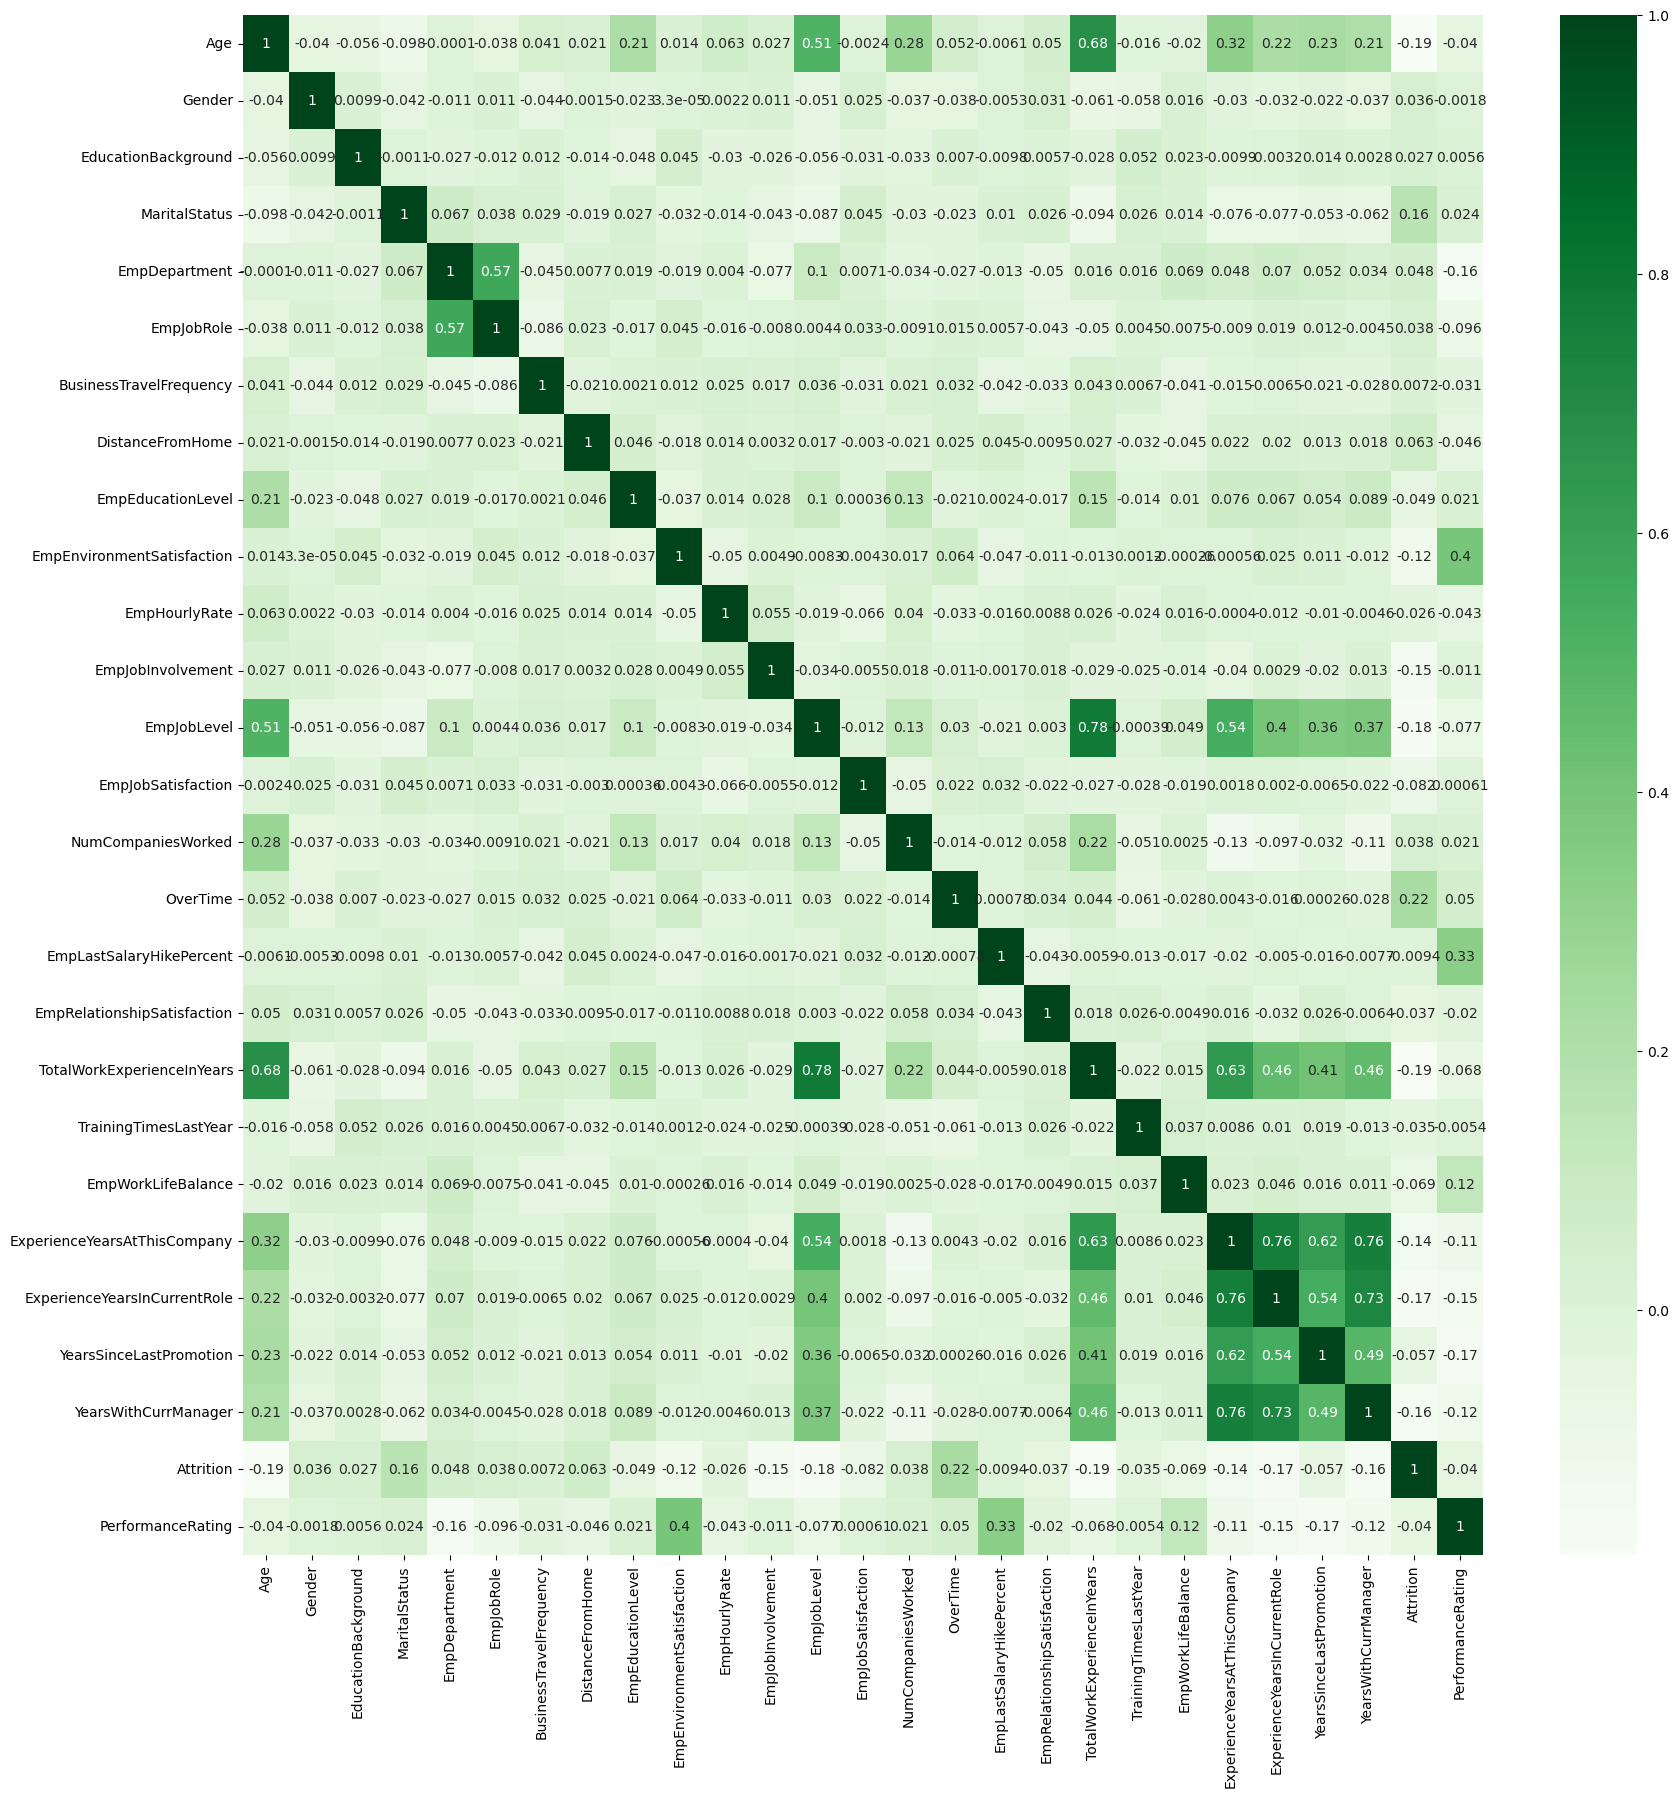

In [50]:
# Finding out the correlation coeffecient to find out which predictors are significant.
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True,cmap='Greens')
plt.show()

- From above heatmap we are clearly seen their is no highly correlated feature in data

# Checking for Duplicate

In [51]:
data1.duplicated().sum()

0

- there is no duplicates in this dataset

#  PRINCIPLE COMPONENT ANALYSIS (PCA)
- PCA is a statistical technique for reducing the dimensionality of a dataset.
- The dataset contain 27 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

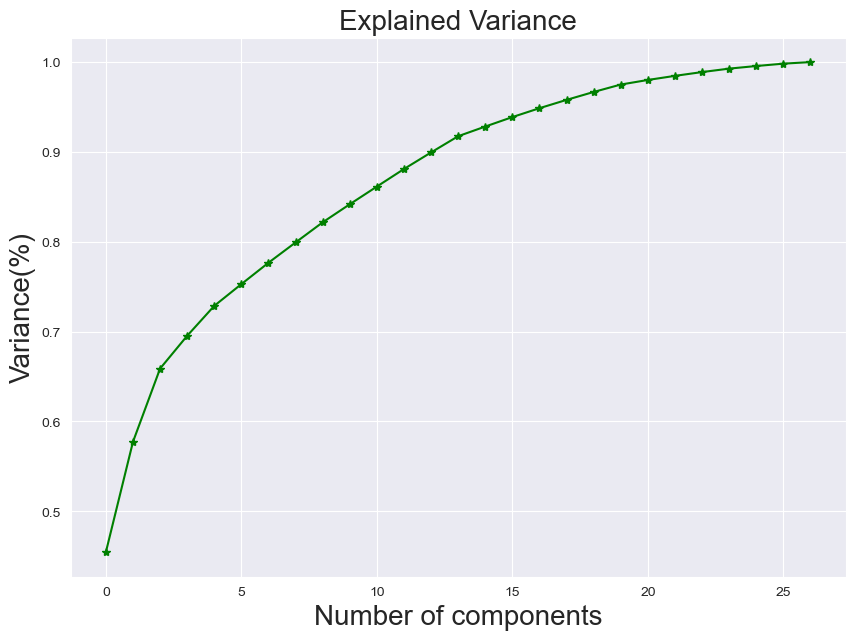

In [52]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

pca = PCA() # Object creation

principlecomponent = pca.fit_transform(data1)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='g',marker='*')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

# Observation:
- Data is contain total 27 feature after dropping unique from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [53]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data1)
new_data

array([[-4.28172063, -1.73099007,  0.68572086, ..., -0.19224568,
         0.08584474, -0.0938207 ],
       [-4.22543922, -0.18971646,  1.40891969, ..., -0.24263492,
         0.0917286 ,  0.31825344],
       [-4.22240523,  2.55629284,  3.23331767, ...,  0.77223625,
        -0.33382481, -0.29257665],
       ...,
       [-5.34688706, -1.49471702,  1.8478991 , ...,  1.22787706,
         0.68628722,  0.19427433],
       [ 8.49569741, -1.76675103,  1.3163625 , ..., -1.10709004,
        -0.69442969,  0.01664645],
       [-4.23576039,  5.80376143, -2.4049616 , ..., -0.06927706,
         0.07777539,  0.21655898]])

# Creating new DataFrame

In [54]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data1.PerformanceRating
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.281721,-1.730990,0.685721,-0.441746,-0.028997,-1.117193,-0.787246,-1.566236,0.485979,1.024164,-1.064343,-0.461018,0.289628,-0.307367,-1.022124,0.609675,-1.295085,-0.052346,-0.312112,0.257337,0.065865,-0.522978,-0.192246,0.085845,-0.093821,3
1,-4.225439,-0.189716,1.408920,-0.545750,0.201346,0.575267,-1.700540,0.481961,1.427908,1.366768,-0.793965,0.424415,1.265188,-1.094910,-0.640013,0.347673,-0.986652,-0.555149,0.888014,-0.516390,-0.089336,-0.533706,-0.242635,0.091729,0.318253,3
2,-4.222405,2.556293,3.233318,-0.442965,-0.530594,-0.283403,-1.855741,0.737663,-1.132302,1.757157,0.942867,1.095937,-0.408100,-1.786211,-1.686301,0.782790,0.020054,0.948619,0.418698,0.005717,-0.308796,-0.168867,0.772236,-0.333825,-0.292577,4
3,1.063595,0.875954,4.381279,-0.467029,-2.372334,-0.709746,0.975292,0.005812,-0.217598,-0.441782,-0.370156,-0.306249,0.057387,0.044671,1.992816,-0.280074,1.014011,0.714538,-1.858544,0.253726,0.368821,-0.533036,0.021257,0.437772,-0.629517,3
4,-4.135184,5.815539,-0.623870,-1.426843,-0.022443,2.458123,0.817013,0.576747,0.969030,1.104659,-0.444067,-0.831433,0.250623,-0.784630,0.501480,-0.125560,-0.716940,-0.702630,1.245046,-0.768162,-0.134469,-0.536426,-0.446516,-0.268536,-0.922754,3


# Save pre-process data

In [55]:
principle_df.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.281721,-1.730990,0.685721,-0.441746,-0.028997,-1.117193,-0.787246,-1.566236,0.485979,1.024164,-1.064343,-0.461018,0.289628,-0.307367,-1.022124,0.609675,-1.295085,-0.052346,-0.312112,0.257337,0.065865,-0.522978,-0.192246,0.085845,-0.093821,3
1,1,-4.225439,-0.189716,1.408920,-0.545750,0.201346,0.575267,-1.700540,0.481961,1.427908,1.366768,-0.793965,0.424415,1.265188,-1.094910,-0.640013,0.347673,-0.986652,-0.555149,0.888014,-0.516390,-0.089336,-0.533706,-0.242635,0.091729,0.318253,3
2,2,-4.222405,2.556293,3.233318,-0.442965,-0.530594,-0.283403,-1.855741,0.737663,-1.132302,1.757157,0.942867,1.095937,-0.408100,-1.786211,-1.686301,0.782790,0.020054,0.948619,0.418698,0.005717,-0.308796,-0.168867,0.772236,-0.333825,-0.292577,4
3,3,1.063595,0.875954,4.381279,-0.467029,-2.372334,-0.709746,0.975292,0.005812,-0.217598,-0.441782,-0.370156,-0.306249,0.057387,0.044671,1.992816,-0.280074,1.014011,0.714538,-1.858544,0.253726,0.368821,-0.533036,0.021257,0.437772,-0.629517,3
4,4,-4.135184,5.815539,-0.623870,-1.426843,-0.022443,2.458123,0.817013,0.576747,0.969030,1.104659,-0.444067,-0.831433,0.250623,-0.784630,0.501480,-0.125560,-0.716940,-0.702630,1.245046,-0.768162,-0.134469,-0.536426,-0.446516,-0.268536,-0.922754,3


In [56]:
# Creating independent and dependent variable.
X = df.drop('PerformanceRating',axis=1)
y = df['PerformanceRating']

In [57]:
y.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

# Model creation and Prediction
### Here i tested with SIX Algorithms
- 1. Support Vector Machine (SMV).
- 2. Decision Tree with GridSearchCV.
- 3. Random Forest with GridSearchCV.
- 4. Naive Bayes Bernoulli
- 5. K-Nearest Neighbor
- 6. Artificial Neural Network.

## Smote the data
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

# Split the data

In [59]:
# Splitting into train and test for calculating the accuracy
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 1. Support Vector Machine (SMV)

In [60]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [61]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [62]:
# Finding accuracy, precision, recall 
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        38
           3       0.75      1.00      0.85       179
           4       0.00      0.00      0.00        23

    accuracy                           0.75       240
   macro avg       0.25      0.33      0.28       240
weighted avg       0.56      0.75      0.64       240



In [63]:
svm_acc=accuracy_score(y_test,y_predict_svm)
svm_acc

0.7458333333333333

### Support vector classifier accuracy is 74.5% it's perform good on testing data.

In [64]:
# Confusion matrix
confusion_matrix(y_test,y_predict_svm)

array([[  0,  38,   0],
       [  0, 179,   0],
       [  0,  23,   0]], dtype=int64)

# 2.  Decision Tree with GridSearchCV

In [65]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [66]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [67]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [68]:
print(classification_report(y_test,y_predict_dtree))

              precision    recall  f1-score   support

           2       0.75      0.79      0.77        38
           3       0.91      0.90      0.91       179
           4       0.62      0.65      0.64        23

    accuracy                           0.86       240
   macro avg       0.76      0.78      0.77       240
weighted avg       0.86      0.86      0.86       240



In [69]:
dt_acc=accuracy_score(y_test,y_predict_dtree)
dt_acc

0.8583333333333333

### Decision Tree accuracy is 85.8% it's perform very good on testing data.

In [70]:
# Confution matrix
confusion_matrix(y_test,y_predict_dtree)

array([[ 30,   7,   1],
       [ 10, 161,   8],
       [  0,   8,  15]], dtype=int64)

# 3. Random Forest with GridSearchCV

In [71]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [72]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3}

In [73]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [74]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           2       1.00      0.68      0.81        38
           3       0.89      1.00      0.94       179
           4       1.00      0.52      0.69        23

    accuracy                           0.90       240
   macro avg       0.96      0.74      0.81       240
weighted avg       0.92      0.90      0.90       240



In [75]:
rf_acc=accuracy_score(y_test,y_predict_rf)
rf_acc

0.9041666666666667

### Random Forest with GridSearchCV accuracy is 90.4% it's perform Excellent on testing data.

In [76]:
# Confution matrix
confusion_matrix(y_test,y_predict_rf)

array([[ 26,  12,   0],
       [  0, 179,   0],
       [  0,  11,  12]], dtype=int64)

# 4. Naive Bayes Bernoulli

In [77]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)


BernoulliNB()

In [78]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [79]:
# Finding accuracy, precision, recall 
print(classification_report(y_test,y_predict_nb))

              precision    recall  f1-score   support

           2       1.00      0.58      0.73        38
           3       0.86      1.00      0.93       179
           4       1.00      0.43      0.61        23

    accuracy                           0.88       240
   macro avg       0.95      0.67      0.75       240
weighted avg       0.90      0.88      0.86       240



In [80]:
nb_acc=accuracy_score(y_test,y_predict_nb)
nb_acc

0.8791666666666667

### Naive Bayes Bernoulli accuracy score is 88% it's perform very good on testing data.

In [81]:
# Confution matrix
confusion_matrix(y_test,y_predict_nb)

array([[ 22,  16,   0],
       [  0, 179,   0],
       [  0,  13,  10]], dtype=int64)

# 5. K-Nearest Neighbour

In [82]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [83]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [84]:
# Finding accuracy, precision, recall 
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           2       0.20      0.03      0.05        38
           3       0.75      0.98      0.85       179
           4       0.00      0.00      0.00        23

    accuracy                           0.74       240
   macro avg       0.32      0.34      0.30       240
weighted avg       0.59      0.74      0.64       240



In [85]:
knn_acc=accuracy_score(y_test,y_predict_knn)
knn_acc

0.7375

### K-Nearest Neighbor accuracy score is 73.7% it's perform good on testing data.

In [86]:
# Confution matrix
confusion_matrix(y_test,y_predict_knn)

array([[  1,  37,   0],
       [  3, 176,   0],
       [  1,  22,   0]], dtype=int64)

# 6. Artificial Neural Network

In [87]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [88]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [89]:
# Finding accuracy, precision, recall 
print(classification_report(y_test,y_predict_mlp))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        38
           3       0.75      0.99      0.86       179
           4       0.67      0.09      0.15        23

    accuracy                           0.75       240
   macro avg       0.47      0.36      0.34       240
weighted avg       0.62      0.75      0.65       240



In [90]:
ann_acc=accuracy_score(y_test,y_predict_mlp)
ann_acc

0.75

### Artificial Neural Network accuracy score is 75% it's perform good on testing data.

In [91]:
# Confution matrix
confusion_matrix(y_test,y_predict_mlp)

array([[  0,  38,   0],
       [  0, 178,   1],
       [  0,  21,   2]], dtype=int64)

# Model Evaluation

In [92]:
models=pd.DataFrame({"models":["Support Vector Machine","Decision Tree","Random Forest","Naive Bayes Bernoulli","K-Nearest Neighbour","Artificial Neural Network"],
                    "Accuracy":[svm_acc,dt_acc,rf_acc,nb_acc,knn_acc,ann_acc]})
models.sort_values(by='Accuracy',ascending=0)

,models,Accuracy
2,Random Forest,0.904167
3,Naive Bayes Bernoulli,0.879167
1,Decision Tree,0.858333
5,Artificial Neural Network,0.750000
0,Support Vector Machine,0.745833
4,K-Nearest Neighbour,0.737500


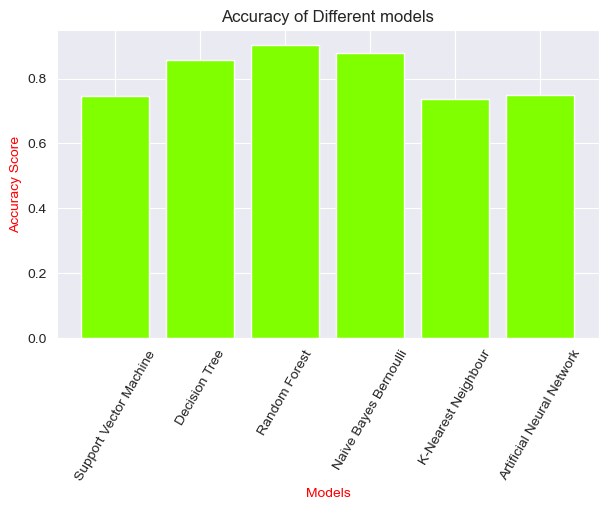

In [93]:
plt.figure(figsize=(7,4))
plt.bar(models['models'], models['Accuracy'],color='#7FFF00')
plt.xlabel('Models',color= 'r')
plt.ylabel('Accuracy Score', color = 'r')
plt.title('Accuracy of Different models')
plt.xticks(rotation=60)
plt.show()

# Conclusion.

- It was observed that the maximum accuracy was obtained when we used Random Forest with GridSearchCV which was 90%. Naive Bayes Bernoulli an accuracy of 88%.
- The important features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in current role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
- The development and sales department is having an overall higher performance comparing to rest of the departments.
- Improve Employee's work-life balance this affects the performance rating.